# Time Series Forecasting of Stock Market Data with ARIMA in Python


Author: Dr. Muhammad Aammar Tufail\
[<img src="https://raw.githubusercontent.com/FortAwesome/Font-Awesome/6.x/svgs/brands/youtube.svg" width="50" height="50">](https://www.youtube.com/channel/UCmNXJXWONLNF6bdftGY0Otw/)
[<img src="https://raw.githubusercontent.com/FortAwesome/Font-Awesome/6.x/svgs/brands/linkedin.svg" width="50" height="50">](https://www.linkedin.com/in/dr-muhammad-aammar-tufail-02471213b/)
[<img src="https://raw.githubusercontent.com/FortAwesome/Font-Awesome/6.x/svgs/brands/github.svg" width="50" height="50">](https://github.com/AammarTufail)
[<img src="https://raw.githubusercontent.com/FortAwesome/Font-Awesome/6.x/svgs/brands/twitter.svg" width="50" height="50">](https://twitter.com/aammar_tufail)
[<img src="https://raw.githubusercontent.com/FortAwesome/Font-Awesome/6.x/svgs/brands/facebook.svg" width="50" height="50">](https://www.facebook.com/groups/codanics/permalink/)


# 1. Time Series Data
`Time series` data is a type of data that is collected over time at regular intervals. It is a sequence of data points that are ordered chronologically and can be used to analyze trends, patterns, and behaviors over time. Time series data can be collected from a variety of sources, such as sensors, financial markets, weather stations, and social media platforms.

Examples of time series data include stock prices, temperature readings, website traffic, and sales data. Time series data can be analyzed using various statistical and machine learning techniques, such as regression analysis, ARIMA models, and deep learning models.

Time series data is often used in forecasting and prediction applications, where the goal is to predict future values based on past observations. Time series analysis can also be used to identify anomalies, trends, and seasonality in the data, which can provide insights into the underlying processes that generate the data.

`Overall,` time series data is an important type of data that is used in many different fields, including finance, economics, engineering, and social sciences.

- `Time series` data is a sequence of data points collected over time that can be used to analyze trends and patterns. It can be collected from various sources and analyzed using statistical and machine learning techniques. 
- `Time series forecasting` is the process of predicting future values based on past observations. Time series data is used in many different fields, including finance, economics, engineering, and social sciences.

# Stock Market Data scraping in Python

In [65]:
# imporot libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import yfinance as yf
import datetime as dt
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [66]:
date.today()

datetime.date(2023, 6, 24)

In [67]:
# define the dates to fetch data
today = date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2
print("Your data will be between these dates: ", start_date, end_date)

Your data will be between these dates:  2022-06-24 2023-06-24


In [68]:
# deifne the ticker
ticker = 'GOOGL'

df = yf.download(ticker, start=start_date, end=end_date, progress=False)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-24,112.995003,118.079002,112.952499,117.974998,117.974998,41164000
2022-06-27,118.273003,118.579498,115.179497,115.833504,115.833504,36420000
2022-06-28,115.802498,117.309502,111.848000,112.007500,112.007500,35792000
2022-06-29,111.552002,113.160500,110.872498,111.701500,111.701500,24716000
2022-06-30,110.000000,110.888000,106.750000,108.962997,108.962997,43170000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-06-24 to 2023-06-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [70]:
df.insert(0, "Date", df.index, True)
# df["Date"] = df.index
df.reset_index(drop=True, inplace=True)

In [71]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-24,112.995003,118.079002,112.952499,117.974998,117.974998,41164000
1,2022-06-27,118.273003,118.579498,115.179497,115.833504,115.833504,36420000
2,2022-06-28,115.802498,117.309502,111.848000,112.007500,112.007500,35792000
3,2022-06-29,111.552002,113.160500,110.872498,111.701500,111.701500,24716000
4,2022-06-30,110.000000,110.888000,106.750000,108.962997,108.962997,43170000


In [72]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,251,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,2022-12-22 22:16:43.984063744,103.953438,105.483980,102.707054,104.140896,104.140896,3.391902e+07
min,2022-06-24 00:00:00,85.400002,86.519997,83.339996,83.430000,83.430000,9.701400e+06
25%,2022-09-22 12:00:00,95.399998,96.930000,94.130001,95.555000,95.555000,2.627465e+07
50%,2022-12-21 00:00:00,102.389999,103.889999,101.220001,102.900002,102.900002,3.104540e+07
75%,2023-03-23 12:00:00,112.185253,114.107998,110.886250,112.533749,112.533749,3.733070e+07
max,2023-06-23 00:00:00,126.970001,129.039993,125.360001,127.309998,127.309998,1.194550e+08
std,NaN,10.816799,10.943709,10.796277,10.924991,10.924991,1.309916e+07


In [73]:
# make a plot on plotly
fig = px.line(df, x='Date', y=df.columns, title='Stock Price')
fig.show()

In [74]:
# select columns
df = df[['Date', 'Close']]
df.head()

,Date,Close
0,2022-06-24,117.974998
1,2022-06-27,115.833504
2,2022-06-28,112.007500
3,2022-06-29,111.701500
4,2022-06-30,108.962997


In [75]:
# plot the data to see how it looks like using plotly
fig = px.line(df, x='Date', y='Close', title='Google Stock Price')
fig.show()

#

In [79]:
# stationarity check on data
from statsmodels.tsa.stattools import adfuller
def adf_test(df):
    result = adfuller(df)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] <= 0.05:
        print("Reject the null hypothesis. Data is stationary")
    else:
        print("Fail to reject the null hypothesis. Data is not stationary")

adf_test(df['Close'])

ADF Statistic: -1.554810
p-value: 0.506244
Fail to reject the null hypothesis. Data is not stationary


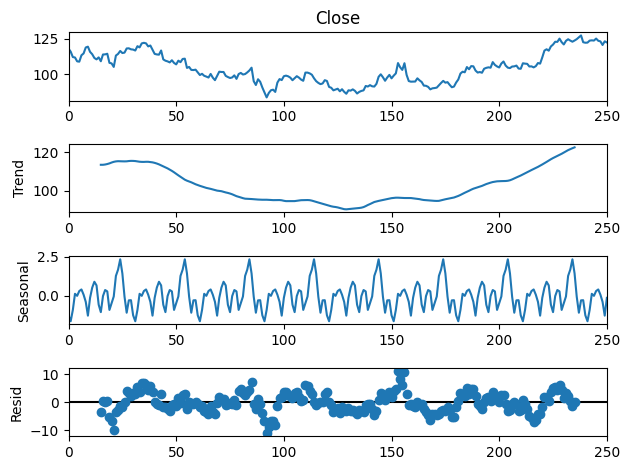

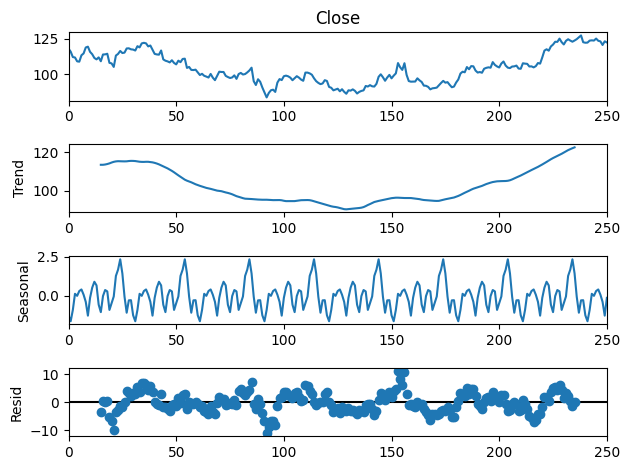

In [82]:
# decompose the data to see the trend, seasonality and noise
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df['Close'], model='additive', period=30)
decompose.plot()

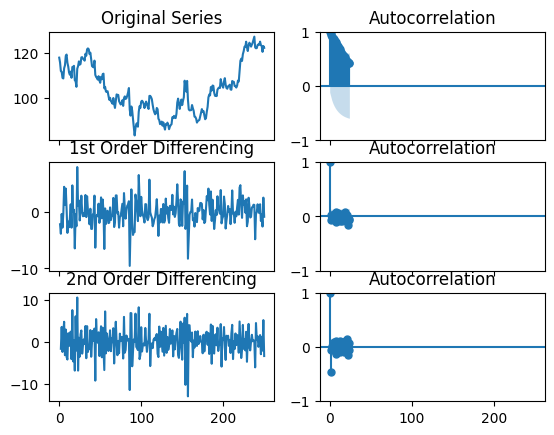

In [83]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df['Close']); axes[0, 0].set_title('Original Series')
plot_acf(df['Close'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['Close'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['Close'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['Close'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['Close'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

`d = 1`

# Lets find `p` value

In [88]:
# plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# pd.plotting.autocorrelation_plot(df['Close'])

# plot_acf(df['Close'], alpha=0.05)

from statsmodels.tsa.stattools import acf, pacf
x_acf = pd.DataFrame(acf(df['Close']))
print(x_acf)

           0
0   1.000000
1   0.967680
2   0.934869
3   0.908629
4   0.882970
5   0.860408
6   0.834713
7   0.808552
8   0.786573
9   0.759204
10  0.730694
11  0.700909
12  0.672313
13  0.645865
14  0.618340
15  0.591556
16  0.570855
17  0.548070
18  0.526802
19  0.500679
20  0.478966
21  0.462213
22  0.444280
23  0.428058


`p = 2`

# Lets find `q` value

/Users/babaaammar/mambaforge/envs/python_ml/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



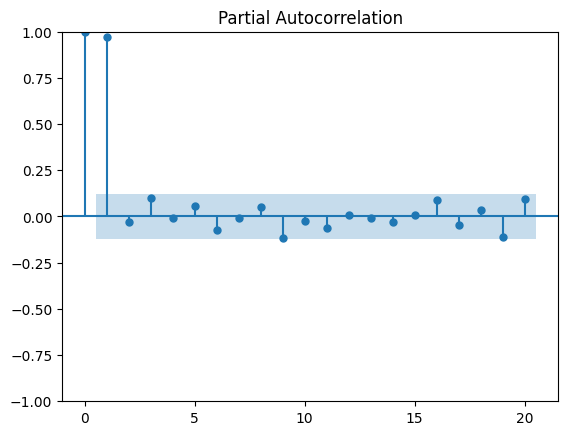

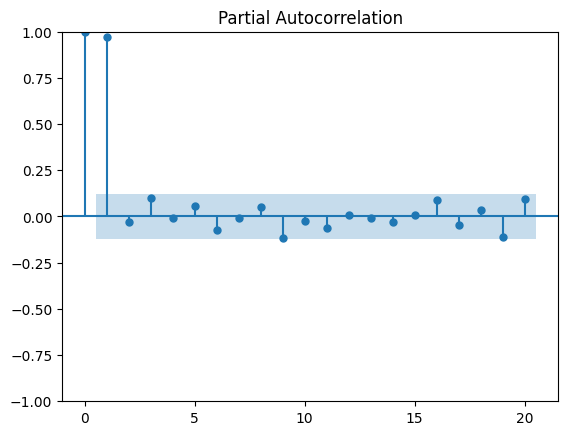

In [89]:
# partial autocorrelation
from statsmodels.tsa.stattools import acf, pacf
plot_pacf(df['Close'], lags=20, alpha=0.05)

In [90]:
# lets define p, d, q
p = 2
d = 1
q = 2

In [91]:
# lets run arima with pmdarima
from pmdarima.arima import auto_arima

model = auto_arima(df['Close'], start_p=1, start_q=1, max_p=2, max_q=2, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.53 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1273.083, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1211.308, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.30 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1275.083, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1177.029, Time=2.95 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=22.07 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1175.030, Time=1.93 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1209.532, Time=0.04 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=18.07 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.17 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1177.029, Time=2.27 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1174.228, Time=24.26 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=inf

In [92]:
print(model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  251
Model:             SARIMAX(1, 1, 1)x(2, 1, [], 12)   Log Likelihood                -582.114
Date:                             Sat, 24 Jun 2023   AIC                           1174.228
Time:                                     10:11:11   BIC                           1191.590
Sample:                                          0   HQIC                          1181.225
                                             - 251                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9117      0.059     15.524      0.000       0.797       1.027
ma.L1         -0.9736      

In [93]:
model = auto_arima(df['Close'], seasonal=True, suppress_warnings=True)
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  251
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -570.633
Date:                Sat, 24 Jun 2023   AIC                           1143.266
Time:                        10:12:05   BIC                           1146.787
Sample:                             0   HQIC                          1144.683
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         5.6248      0.364     15.454      0.000       4.911       6.338
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                35.06
Prob(Q):                              0.74   Pr

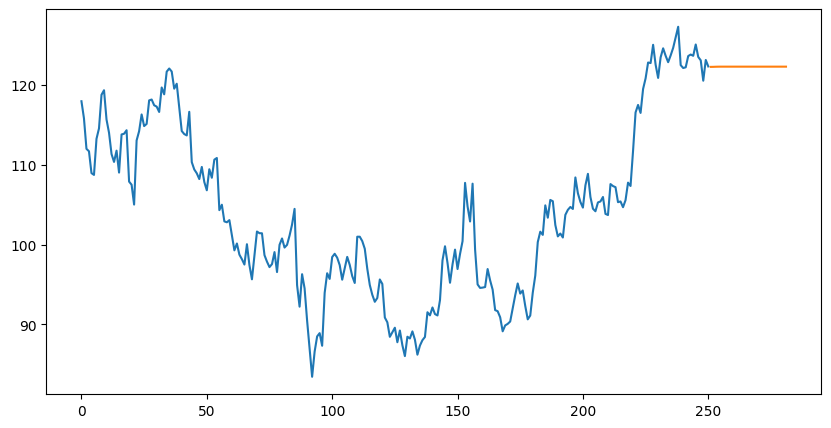

In [109]:
# stats model and arima
from statsmodels.tsa.arima.model import ARIMA
p, d, q = 2, 1, 2

model = ARIMA(df['Close'], order=(p, d, q))
model = model.fit()
# print(model.summary())

# predict next 30 days
forecast = model.predict(len(df["Close"]), len(df['Close'])+30)
# print(forecast)

#plot forecast
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Actual')
plt.plot(forecast, label='Forecast')

In [114]:
# let's run SARIMA
import statsmodels.api as sm
import warnings

p , d, q = 2, 1, 2

model = sm.tsa.statespace.SARIMAX(df['Close'], 
                                  order=(p, d, q), 
                                  seasonal_order=(p, d, q, 12))
model = model.fit()
print(model.summary())

/Users/babaaammar/mambaforge/envs/python_ml/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.49657D+00    |proj g|=  3.41936D-01

At iterate    5    f=  2.24278D+00    |proj g|=  2.80936D-02

At iterate   10    f=  2.23811D+00    |proj g|=  3.55089D-03

At iterate   15    f=  2.23731D+00    |proj g|=  1.85017D-02

At iterate   20    f=  2.23556D+00    |proj g|=  5.51384D-03

At iterate   25    f=  2.23517D+00    |proj g|=  3.15349D-03

At iterate   30    f=  2.23479D+00    |proj g|=  4.38082D-03

At iterate   35    f=  2.23473D+00    |proj g|=  3.27360D-04

At iterate   40    f=  2.23472D+00    |proj g|=  5.86564D-04

At iterate   45    f=  2.23448D+00    |proj g|=  2.80942D-03


/Users/babaaammar/mambaforge/envs/python_ml/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  2.23380D+00    |proj g|=  1.58882D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     57      1     0     0   1.589D-03   2.234D+00
  F =   2.2338039754709849     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -560.685
Date:                            Sat, 24 Jun 2023   AIC                           1139.3

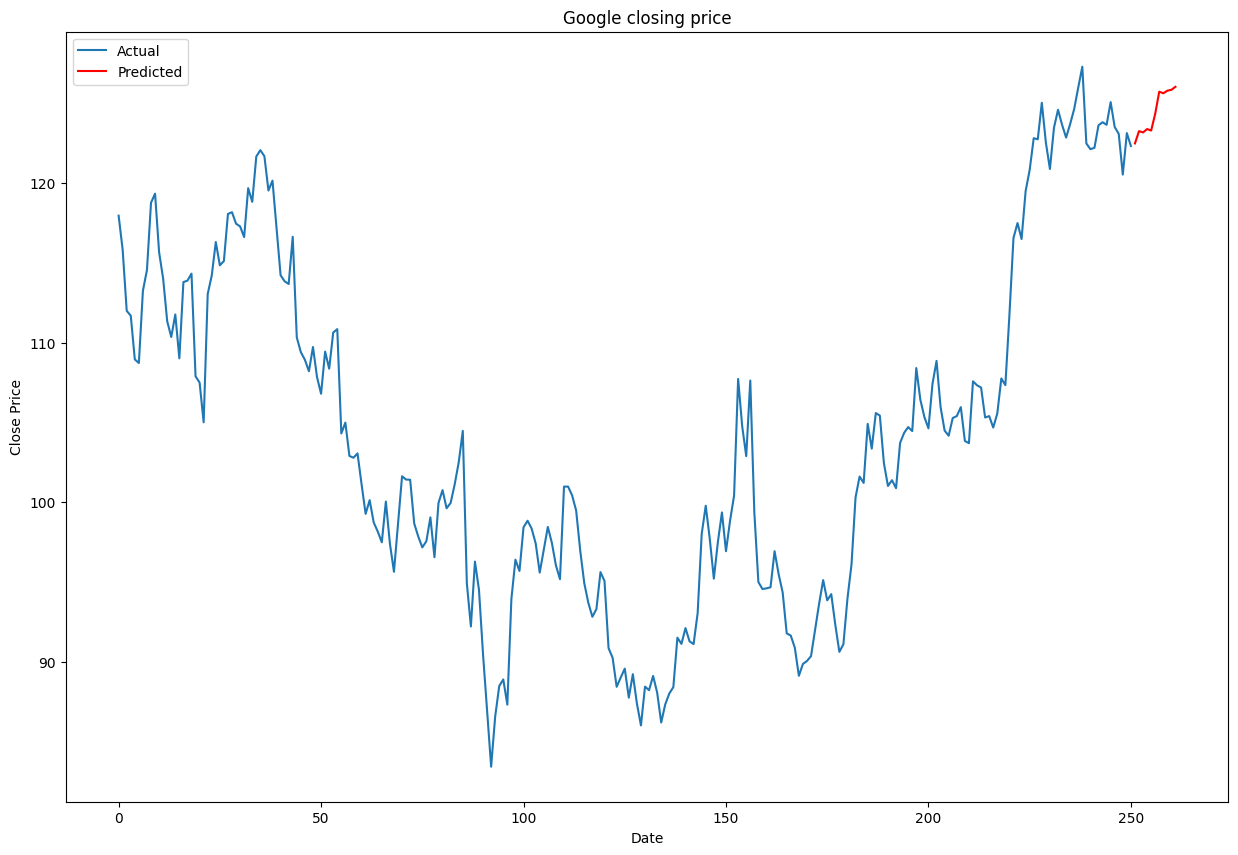

In [118]:
predictions = model.predict(start=len(df['Close']), end=len(df['Close'])+10)

# plot the predictions
plt.figure(figsize=(15, 10))
plt.plot(df["Close"], label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Google closing price')
# change legend location
plt.legend(loc='upper left')
plt.show()


/Users/babaaammar/mambaforge/envs/python_ml/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/babaaammar/mambaforge/envs/python_ml/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.32948D+00    |proj g|=  1.12784D-01

At iterate    5    f=  2.23269D+00    |proj g|=  1.62871D-02

At iterate   10    f=  2.22955D+00    |proj g|=  2.59265D-03

At iterate   15    f=  2.22895D+00    |proj g|=  6.23245D-03

At iterate   20    f=  2.22870D+00    |proj g|=  4.39411D-04

At iterate   25    f=  2.22864D+00    |proj g|=  3.10538D-03

At iterate   30    f=  2.22863D+00    |proj g|=  1.17465D-04

At iterate   35    f=  2.22863D+00    |proj g|=  6.64278D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

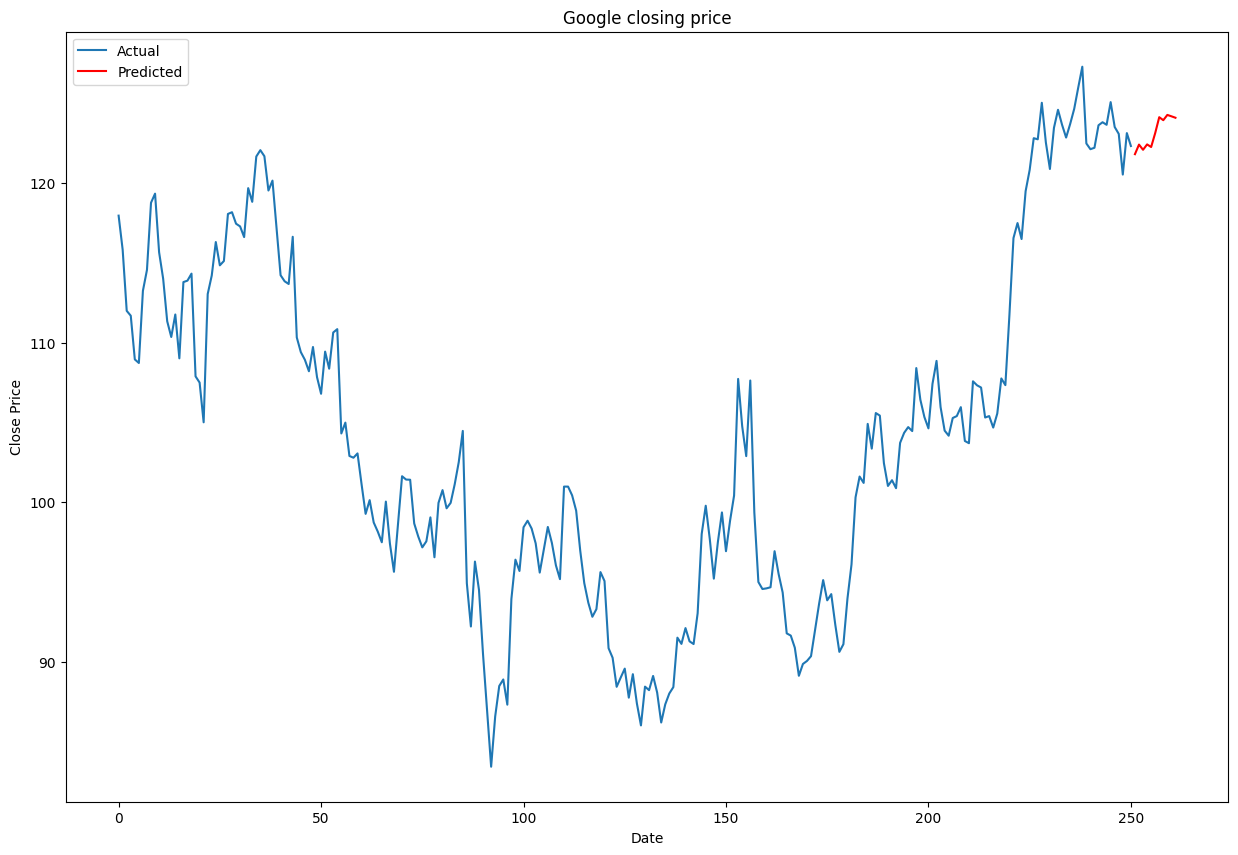

In [119]:
# lets update p, d, q
# let's run SARIMA
import statsmodels.api as sm
import warnings

p , d, q = 3, 1, 2

model = sm.tsa.statespace.SARIMAX(df['Close'], 
                                  order=(p, d, q), 
                                  seasonal_order=(p, d, q, 12))
model = model.fit()
predictions = model.predict(start=len(df['Close']), end=len(df['Close'])+10)

# plot the predictions
plt.figure(figsize=(15, 10))
plt.plot(df["Close"], label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Google closing price')
# change legend location
plt.legend(loc='upper left')
plt.show()

# hyper paramter tuning

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.04541D+00    |proj g|=  1.02516D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   7.407D-08   6.045D+00
  F =   6.0454133973217195     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.5

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.65785D+00    |proj g|=  6.78375D-02

At iterate   15    f=  5.40202D+00    |proj g|=  4.12530D-01

At iterate   20    f=  5.35173D+00    |proj g|=  5.88234D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     22     41      1     0     0   2.243D-06   5.352D+00
  F =   5.3517259486393902     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.50499D+00    |proj g|=  8.29006D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  4.54310D+00    |proj g|=  4.76139D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     42      1     0     0   1.004D-04   4.543D+00
  F =   4.5431011631659040     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95993D+00    |proj g|=  3.90772D-01

At iterate    5    f=  2.85428D+00    |proj g|=  1.03373D-01

At iterate   10    f=  2.84937D+00    |proj g|=  4.84000D-06

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.28326D+00    |proj g|=  1.89875D-02

At iterate   10    f=  5.18302D+00    |proj g|=  7.04466D-01

At iterate   15    f=  3.59563D+00    |proj g|=  8.52910D+00

At iterate   20    f=  2.87424D+00    |proj g|=  1.92429D-01

At iterate   25    f=  2.87330D+00    |proj g|=  4.69571D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     63      1     0     0   4.696D-06   2.873D+00
  F =   2.8733014084847381     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

 This problem is unconstrained.



At iterate   15    f=  3.51033D+00    |proj g|=  1.05133D+00

At iterate   20    f=  3.14407D+00    |proj g|=  8.46342D-01

At iterate   25    f=  2.99767D+00    |proj g|=  4.44911D-01

At iterate   30    f=  2.91629D+00    |proj g|=  1.07418D-01

At iterate   35    f=  2.88430D+00    |proj g|=  3.15010D-01

At iterate   40    f=  2.86737D+00    |proj g|=  1.06194D-01

At iterate   45    f=  2.85990D+00    |proj g|=  1.44306D-01

At iterate   50    f=  2.85633D+00    |proj g|=  1.80096D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     97      1     0     0   1.801D-01   2.856D+00
  F =   2.85633135648

/Users/babaaammar/mambaforge/envs/python_ml/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.77584D+00    |proj g|=  1.77386D-01

At iterate   10    f=  2.70559D+00    |proj g|=  6.18841D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     16      1     0     0   1.089D-05   2.706D+00
  F =   2.7055865427035131     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.80925D+00    |proj g|=  4.11382D-01

At iterate    5    f=  2.76010D+00    |proj g|=  6.38788D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.06652D+00    |proj g|=  2.29216D-03

At iterate   10    f=  2.06650D+00    |proj g|=  1.59835D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     13     15      1     0     0   5.769D-06   2.066D+00
  F =   2.0664976782585658     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.15260D+00    |proj g|=  4.94533D-06

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.25230D+00    |proj g|=  4.13153D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      6      1     0     0   7.497D-07   2.252D+00
  F =   2.2522836523145098     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.1

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.15279D+00    |proj g|=  1.11432D-02

At iterate    5    f=  2.15260D+00    |proj g|=  1.79257D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      8      1     0     0   1.793D-06   2.153D+00
  F =   2.1525992067290374     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterat

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
/Users/babaaammar/mambaforge/envs/python_ml/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

 This problem is unconstrained.
 This problem is unconstrained.


At iterate   40    f=  2.15855D+00    |proj g|=  1.36734D-01

At iterate   45    f=  2.15801D+00    |proj g|=  2.92782D-01

At iterate   50    f=  2.15748D+00    |proj g|=  1.45809D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     50     71      1     0     0   1.458D-01   2.157D+00
  F =   2.1574824378963164     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.50622D+00    |proj g|=  2.39528D-05

        

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  2.20325D+00    |proj g|=  1.86126D-01

At iterate   15    f=  2.15254D+00    |proj g|=  2.50751D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     30      1     0     0   5.470D-04   2.153D+00
  F =   2.1525143986318307     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.70454D+00    |proj g|=  1.03013D+00

At iterate    5    f=  2.20723D+00    |proj g|=  2.05952D+00

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  2.22158D+00    |proj g|=  3.36309D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     13      1     0     0   3.363D-07   2.222D+00
  F =   2.2215818854727423     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.35406D+00    |proj g|=  4.31575D-01

At iterate    5    f=  2.14029D+00    |proj g|=  2.97960D-01

At iterate   10    f=  2.08547D+00    |proj g|=  5.48295D-01

At iter

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
/Users/babaaammar/mambaforge/envs/python_ml/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   15    f=  2.19374D+00    |proj g|=  4.38565D-01

At iterate   20    f=  2.16467D+00    |proj g|=  1.33511D+00

At iterate   25    f=  2.15890D+00    |proj g|=  4.73371D-01

At iterate   30    f=  2.15440D+00    |proj g|=  5.08396D-01

At iterate   35    f=  2.15247D+00    |proj g|=  1.42990D-01

At iterate   40    f=  2.15145D+00    |proj g|=  1.59727D-01

At iterate   45    f=  2.15070D+00    |proj g|=  1.66521D-01

At iterate   50    f=  2.15029D+00    |proj g|=  3.70330D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     67      1     0     0   3.703D-01   2.150D+00
  F =   2.15028830995

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.06818D+00    |proj g|=  6.91368D-02

At iterate   10    f=  2.06330D+00    |proj g|=  1.20605D-03

At iterate   15    f=  2.06329D+00    |proj g|=  8.02403D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     21      1     0     0   8.024D-06   2.063D+00
  F =   2.0632906123656136     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.72376D+00    |proj g|=  1.05037D+00

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.69865D+00    |proj g|=  1.03063D+00

At iterate    5    f=  2.19750D+00    |proj g|=  2.24698D+00

At iterate   10    f=  2.18022D+00    |proj g|=  3.68130D-01

At iterate   15    f=  2.16134D+00    |proj g|=  1.20159D-01

At iterate   20    f=  2.16046D+00    |proj g|=  3.80444D-01

At iterate   25    f=  2.15959D+00    |proj g|=  4.38929D-02

At iterate   30    f=  2.13957D+00    |proj g|=  1.09151D-01

At iterate   35    f=  2.13446D+00    |proj g|=  3.81333D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  2.06465D+00    |proj g|=  1.64834D-01

At iterate   15    f=  2.06329D+00    |proj g|=  2.18374D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     29      1     0     0   4.209D-05   2.063D+00
  F =   2.0632901745137455     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.26449D+00    |proj g|=  4.97629D-06

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  2.06639D+00    |proj g|=  1.07100D-03

At iterate   15    f=  2.06639D+00    |proj g|=  1.37824D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     20      1     0     0   1.378D-05   2.066D+00
  F =   2.0663880864325970     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.14539D+00    |proj g|=  2.04202D-02

At iterate    5    f=  2.14505D+00    |proj g|=  4.82934D-06

       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.20425D+00    |proj g|=  1.14389D-01

At iterate    5    f=  2.09859D+00    |proj g|=  1.49675D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     11      1     0     0   3.067D-06   2.098D+00
  F =   2.0984737491767644     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.51010D+00    |proj g|=  6.70212D-03

At iterate    5    f=  2.50985D+00    |proj g|=  1.09465D-02
  ys=-2.192E-02  -gs= 1.807E-03 BFGS update SKIPPED

At iterate   10    f=  2.50289D+00    |proj g|=  2.73721D-01

At iterate   15    f=  2.49701D+00    |proj g|=  1.70880D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     34      1     1     0   4.591D-06   2.497D+00
  F =   2.4970076613626579     

CONVERGENCE: NORM

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


At iterate   10    f=  2.12492D+00    |proj g|=  5.64539D-03

At iterate   15    f=  2.12485D+00    |proj g|=  1.88474D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     21      1     0     0   1.361D-05   2.125D+00
  F =   2.1248465182790799     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.25328D+00    |proj g|=  7.71007D-02

At iterate    5    f=  2.22819D+00    |proj g|=  2.51019D-04

At itera

 This problem is unconstrained.



At iterate   10    f=  2.09005D+00    |proj g|=  3.25447D-03

At iterate   15    f=  2.08972D+00    |proj g|=  1.54287D-02

At iterate   20    f=  2.08944D+00    |proj g|=  2.07769D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     33      1     0     0   8.739D-06   2.089D+00
  F =   2.0894442845966328     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Best SARIMA(0, 1, 1)x(0, 1, 1, 12)12 model - AIC:1039.1937476629414
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

A

 This problem is unconstrained.


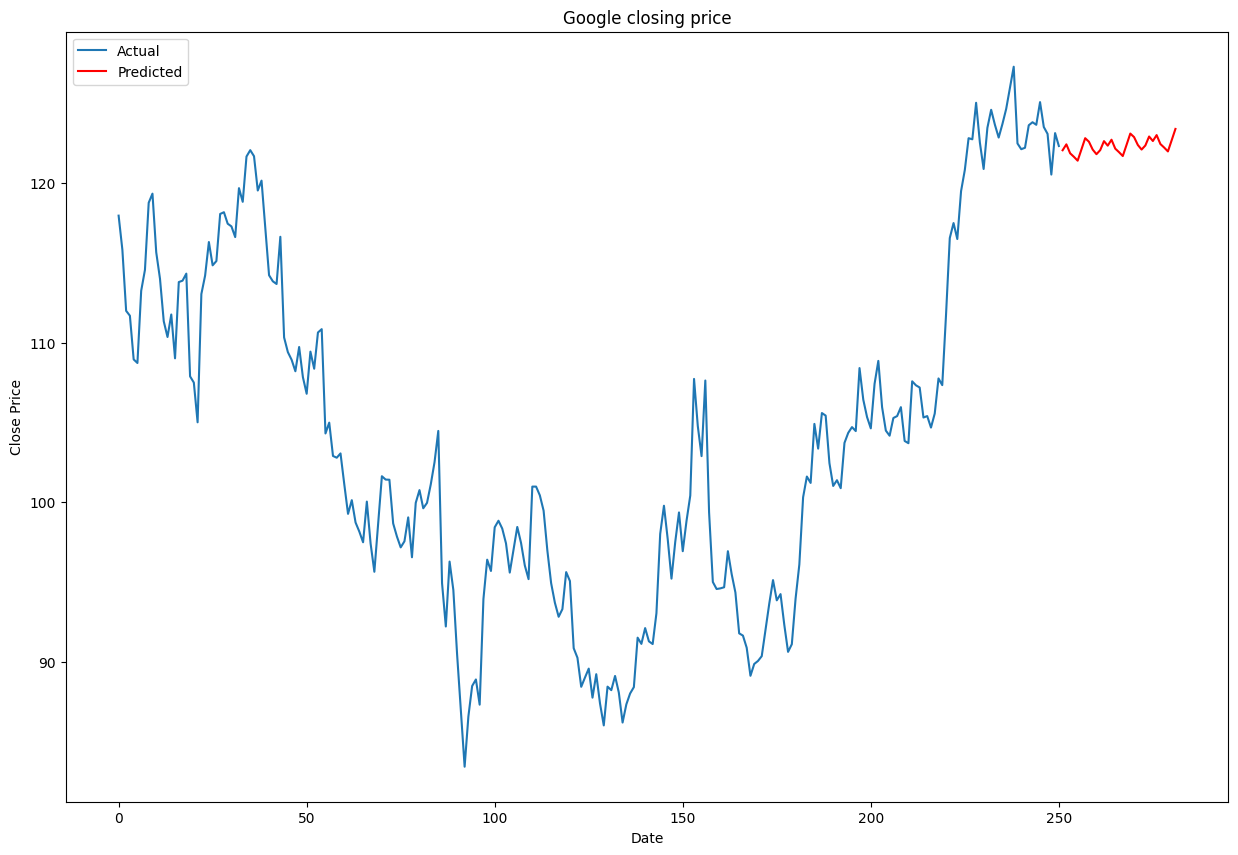

In [120]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np
import itertools

# Assume you have a DataFrame 'df' with your time series data in a column named 'value'
# Assume that the seasonal period of your time series data is 12 (e.g., monthly data)

# Define the p, d, q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d, q and m quadruplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = SARIMAX(df['Close'],
                                 order = param,
                                 seasonal_order = param_seasonal,
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
            results = temp_model.fit()

            # print("SARIMA{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            continue

print("Best SARIMA{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

# predict next 30 days
model = SARIMAX(df['Close'],
                order = best_pdq,
                seasonal_order = best_seasonal_pdq,
                enforce_stationarity=False,
                enforce_invertibility=False)
model = model.fit()
predictions = model.predict(len(df['Close']), len(df['Close'])+30)
# plot the predictions
plt.figure(figsize=(15, 10))
plt.plot(df["Close"], label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Google closing price')
# change legend location
plt.legend(loc='upper left')
plt.show()


In [121]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -516.597
Date:                            Sat, 24 Jun 2023   AIC                           1039.194
Time:                                    10:32:15   BIC                           1049.429
Sample:                                         0   HQIC                          1043.325
                                            - 251                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0112      0.059     -0.188      0.851      -0.128       0.105
ma.S.L12      -1.0000    502.725     -0.002      0.998    -986.323     984.323
sigma2         5.2124   2620.576      0.002      0.998   -5131.022    5141.447
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                27.76
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.63   Skew:                            -0.07
Prob(H) (two-sided):                  0.05   Kurtosis:                         4.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""